In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
data = pd.read_csv('./ModelServices/train.csv', parse_dates=['dateTimeData'], index_col = ['dateTimeData'])
data.head()
# data.describe

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,_id,username,pm2_5Data,pm10Data,tempData,humidityData,__v
dateTimeData,,,,,,,,
2021-04-20 04:22:00,0,60920d3f26208d1e35bfb3b7,bobDaGOAT,10.5,13.0,79,a lot,0
2021-04-22 04:20:00,1,60921081ef80c300159b10de,bobDaGOAT,10.5,13.0,79,a lot,0
2021-04-22 04:20:00,2,60921085ef80c300159b10df,bobDaGOAT,10.5,13.0,79,a lot,0
2021-04-20 04:02:00,3,60921f3240dd68001540fdc8,raspberryPi,2.5,10.0,83,50,0
2021-04-20 04:02:00,4,6092210c40dd68001540fdc9,raspberryPi,2.5,10.0,83,50,0


In [3]:
print(data.groupby('username').size())

username
bob                 3
bobDaGOAT           3
killah-bee     144745
raspberryPi         3
sshekhar93      40406
varun           38262
yash                6
ysahani          3738
dtype: int64


In [4]:
userData = data.loc[data['username'] == 'sshekhar93']
userData.head(-5)

,Unnamed: 0,_id,username,pm2_5Data,pm10Data,tempData,humidityData,__v
dateTimeData,,,,,,,,
2021-05-07 15:41:55.397079,7800,6095c2332269680015f56519,sshekhar93,14.6,18.6,invalid,invalid,0
2021-05-07 15:43:54.637886,7811,6095c2ab2269680015f56524,sshekhar93,16.4,20.6,invalid,invalid,0
2021-05-07 15:44:25.311669,7815,6095c2c92269680015f56528,sshekhar93,15.7,19.5,invalid,invalid,0
2021-05-07 15:44:56.052281,7819,6095c2e82269680015f5652c,sshekhar93,15.1,18.7,invalid,invalid,0
2021-05-07 15:45:26.699848,7823,6095c3072269680015f56530,sshekhar93,14.3,18.5,invalid,invalid,0
...,...,...,...,...,...,...,...,...
2021-07-21 08:50:03.203506,192656,60f8422b469fdc0015ca24b5,sshekhar93,27.6,34.4,71.42,47.5,0
2021-07-21 08:50:34.456402,192659,60f8424a469fdc0015ca24b8,sshekhar93,28.7,35.2,71.24000000000001,47,0
2021-07-21 08:51:06.316770,192662,60f8426a469fdc0015ca24bb,sshekhar93,29.7,36.5,71.24000000000001,49.7,0


In [5]:
pm25Data = userData[['pm2_5Data']]
pm25Data.describe

<bound method NDFrame.describe of                             pm2_5Data
dateTimeData                         
2021-05-07 15:41:55.397079       14.6
2021-05-07 15:43:54.637886       16.4
2021-05-07 15:44:25.311669       15.7
2021-05-07 15:44:56.052281       15.1
2021-05-07 15:45:26.699848       14.3
...                               ...
2021-07-21 08:52:41.485172       32.7
2021-07-21 08:53:13.652483       31.9
2021-07-21 08:53:44.555029       32.4
2021-07-21 08:54:17.049263       33.4
2021-07-21 08:54:47.920632       33.0

[40406 rows x 1 columns]>

In [6]:
pm10Data = userData[['pm10Data']]
pm10Data.describe

<bound method NDFrame.describe of                             pm10Data
dateTimeData                        
2021-05-07 15:41:55.397079      18.6
2021-05-07 15:43:54.637886      20.6
2021-05-07 15:44:25.311669      19.5
2021-05-07 15:44:56.052281      18.7
2021-05-07 15:45:26.699848      18.5
...                              ...
2021-07-21 08:52:41.485172      39.6
2021-07-21 08:53:13.652483      39.4
2021-07-21 08:53:44.555029      39.8
2021-07-21 08:54:17.049263      41.1
2021-07-21 08:54:47.920632      39.5

[40406 rows x 1 columns]>

In [7]:
pm25Data.index.is_all_dates

True

In [8]:
pm10Data.index.is_all_dates

True

In [9]:
print(pm25Data.size)
temp25 = pd.DataFrame(pm25Data.loc[:"2021-05-13 21:41:37.798222"])
print(temp25.size)

temp10 = pd.DataFrame(pm10Data.loc[:"2021-05-13 21:41:37.798222"])
print(temp10.size)

start = pd.to_datetime("2021-05-07 15:41:55")
index = pd.date_range(start, periods = temp25.size, freq = "30S")

pm25DataRef = pd.DataFrame(temp25['pm2_5Data'].tolist(), index = index, columns = ['pm2_5Data'])
print(pm25DataRef.head())


pm10DataRef = pd.DataFrame(temp10['pm10Data'].tolist(), index = index, columns = ['pm10Data'])
print(pm10DataRef.head())


40406
17563
17563
                     pm2_5Data
2021-05-07 15:41:55       14.6
2021-05-07 15:42:25       16.4
2021-05-07 15:42:55       15.7
2021-05-07 15:43:25       15.1
2021-05-07 15:43:55       14.3
                     pm10Data
2021-05-07 15:41:55      18.6
2021-05-07 15:42:25      20.6
2021-05-07 15:42:55      19.5
2021-05-07 15:43:25      18.7
2021-05-07 15:43:55      18.5


In [10]:
from statsmodels.tsa.stattools import adfuller

result25 = adfuller(pm25DataRef.pm2_5Data.dropna())
print(f"ADF Statistic: {result25[0]}")
print(f"p-value: {result25[1]}")

result10 = adfuller(pm10DataRef.pm10Data.dropna())
print(f"ADF Statistic: {result10[0]}")
print(f"p-value: {result10[1]}")

ADF Statistic: -9.873868617598939
p-value: 3.92935112699018e-17
ADF Statistic: -9.594234813223874
p-value: 1.998136255397215e-16


In [11]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model
model25 = ARIMA(pm25DataRef.pm2_5Data, order=(5, 0, 3))
result25 = model25.fit()

model10 = ARIMA(pm10DataRef.pm10Data, order=(10, 0, 3))
result10 = model10.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [12]:
print(result25.summary())

print(result10.summary())

                               SARIMAX Results                                
Dep. Variable:              pm2_5Data   No. Observations:                17563
Model:                 ARIMA(5, 0, 3)   Log Likelihood              -62952.015
Date:                Fri, 30 Jul 2021   AIC                         125924.030
Time:                        14:59:41   BIC                         126001.765
Sample:                    05-07-2021   HQIC                        125949.624
                         - 05-13-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.9733      7.594      2.498      0.012       4.089      33.858
ar.L1          1.1978      0.029     40.904      0.000       1.140       1.255
ar.L2         -0.3881      0.054     -7.240      0.0

In [14]:
n = int(len(pm25DataRef) * 0.8)
train25 = pm25DataRef.pm2_5Data[:n]
test25 = pm25DataRef.pm2_5Data[n:]

train10 = pm10DataRef.pm10Data[:n]
test10 = pm10DataRef.pm10Data[n:]

In [15]:
print(len(train25))
print(len(test25))

print(len(train10))
print(len(test10))

14050
3513
14050
3513


In [16]:
model25 = ARIMA(train25, order=(5, 0, 3))
result25 = model25.fit()

model10 = ARIMA(train10, order=(10, 0, 3))
result10 = model10.fit()


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
#Forecoast
step = test25.size

fc25 = result25.forecast(step)

fc10 = result10.forecast(step)

In [18]:
fc25 = pd.Series(fc25, index=test25[:step].index)
# lower25 = pd.Series(conf25[:, 0], index=test25[:step].index)
# upper25 = pd.Series(conf25[:, 1], index=test25[:step].index)

fc10 = pd.Series(fc10, index=test10[:step].index)
# lower10 = pd.Series(conf10[:, 0], index=test10[:step].index)
# upper10 = pd.Series(conf10[:, 1], index=test10[:step].index)

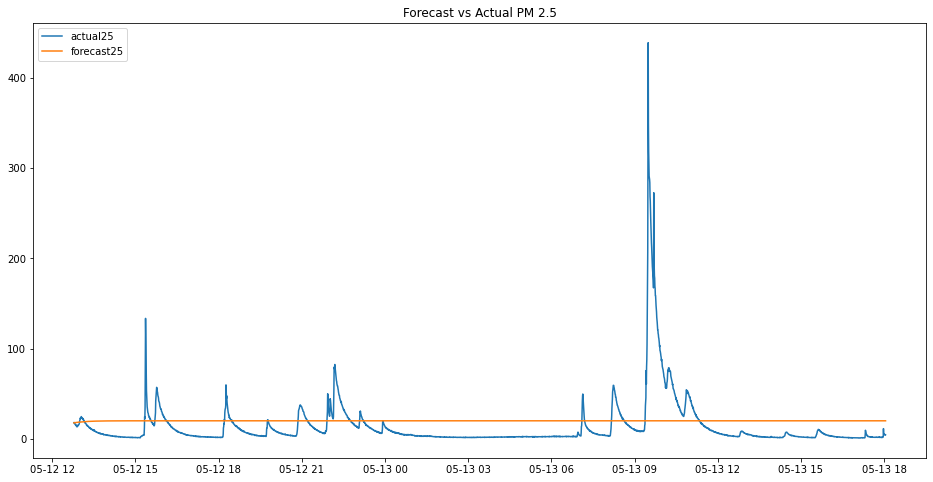

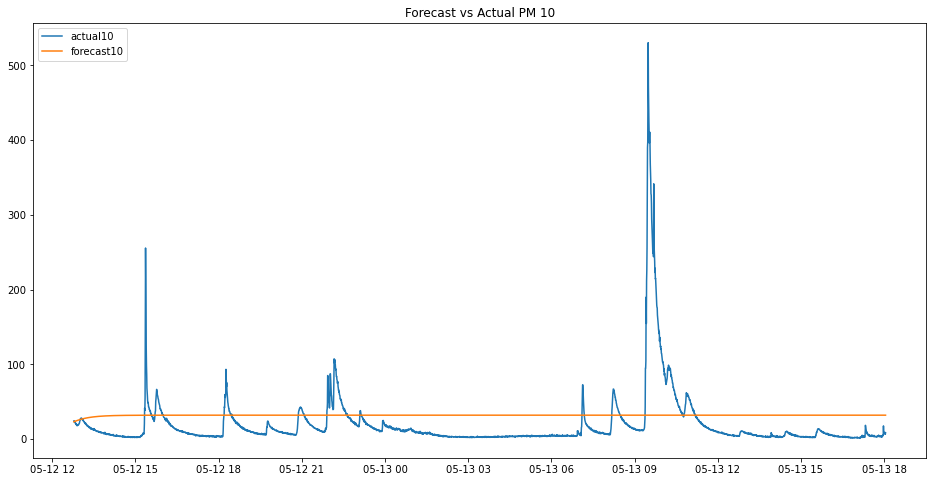

In [19]:
plt.figure(figsize=(16, 8))
plt.plot(test25[:step], label="actual25")
plt.plot(fc25, label="forecast25")
# plt.fill_between(lower25.index, lower25, upper25, color="k", alpha=0.1)
plt.title("Forecast vs Actual PM 2.5")
plt.legend(loc="upper left")


plt.figure(figsize=(16, 8))
plt.plot(test10[:step], label="actual10")
plt.plot(fc10, label="forecast10")
# plt.fill_between(lower10.index, lower10, upper10, color="k", alpha=0.1)
plt.title("Forecast vs Actual PM 10")
plt.legend(loc="upper left")

In [63]:
fc25

2021-05-12 12:46:55    17.944702
2021-05-12 12:47:25    17.939720
2021-05-12 12:47:55    17.964047
2021-05-12 12:48:25    18.018647
2021-05-12 12:48:55    18.060144
                         ...    
2021-05-13 18:00:55    18.011588
2021-05-13 18:01:25    18.011588
2021-05-13 18:01:55    18.011588
2021-05-13 18:02:25    18.011588
2021-05-13 18:02:55    18.011588
Freq: 30S, Name: predicted_mean, Length: 3513, dtype: float64

In [22]:
import pickle

In [23]:
pickle.dump(result25,open('./ModelServices/result25.pkl','wb'))
pickle.dump(result10,open('./ModelServices/result10.pkl','wb'))

In [24]:
start_index = pd.Timestamp(pd.datetime.now().strftime("%Y-%m-%d %X"))
end_index = start_index + pd.Timedelta(hours=1)
forecastdirect = result25.predict(start=start_index, end= end_index)



<ipython-input-24-68c7f44b71d2>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_index = pd.Timestamp(pd.datetime.now().strftime("%Y-%m-%d %X"))


2021-07-30 15:16:55    20.270442
2021-07-30 15:17:25    20.270442
2021-07-30 15:17:55    20.270442
2021-07-30 15:18:25    20.270442
2021-07-30 15:18:55    20.270442
                         ...    
2021-07-30 16:14:55    20.270442
2021-07-30 16:15:25    20.270442
2021-07-30 16:15:55    20.270442
2021-07-30 16:16:25    20.270442
2021-07-30 16:16:55    20.270442
Freq: 30S, Name: predicted_mean, Length: 121, dtype: float64


In [25]:
print(forecastdirect)

2021-07-31 19:46:55    20.270442
2021-07-31 19:47:25    20.270442
2021-07-31 19:47:55    20.270442
2021-07-31 19:48:25    20.270442
2021-07-31 19:48:55    20.270442
                         ...    
2021-07-31 20:44:55    20.270442
2021-07-31 20:45:25    20.270442
2021-07-31 20:45:55    20.270442
2021-07-31 20:46:25    20.270442
2021-07-31 20:46:55    20.270442
Freq: 30S, Name: predicted_mean, Length: 121, dtype: float64


In [27]:
loadedResult25 = pickle.load(open('./ModelServices/result25.pkl','rb'))
start_index = pd.Timestamp(pd.datetime.now().strftime("%Y-%m-%d %X"))
end_index = start_index + pd.Timedelta(hours=1)
forecastloaded = loadedResult25.predict(start=start_index, end= end_index)
print(forecastloaded)

<ipython-input-27-1dea28022afc>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_index = pd.Timestamp(pd.datetime.now().strftime("%Y-%m-%d %X"))


2021-07-31 19:50:55    20.270442
2021-07-31 19:51:25    20.270442
2021-07-31 19:51:55    20.270442
2021-07-31 19:52:25    20.270442
2021-07-31 19:52:55    20.270442
                         ...    
2021-07-31 20:48:55    20.270442
2021-07-31 20:49:25    20.270442
2021-07-31 20:49:55    20.270442
2021-07-31 20:50:25    20.270442
2021-07-31 20:50:55    20.270442
Freq: 30S, Name: predicted_mean, Length: 121, dtype: float64
